# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()
len(df_raw)

400

Answer: 400

#### Question 2. Create a summary table

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE is a test that has a maximum score of 800 with a design to have the median in the 500 range so the standard deviation is much larger than a for a metric that has a maximum value of 4 and in this case where the median is 3.4 

#### Question 4. Drop data points with missing data


In [18]:
df_new = df_raw.dropna()
df_new

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [20]:
df_new[pd.isnull(df_new).any(axis=1)]

,admit,gre,gpa,prestige


Answer: Function above shows rows with cells of null value

#### Question 6. Create box plots for GRE and GPA

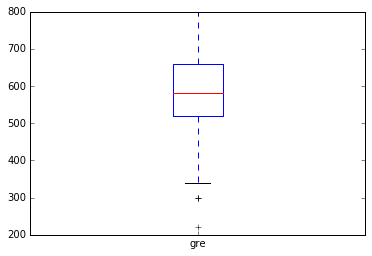

In [22]:
df_new[['gre']].plot(kind='box')

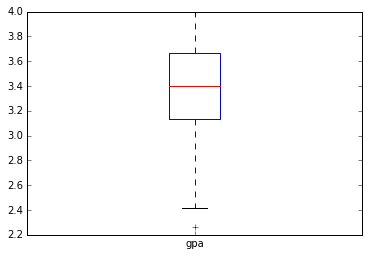

In [23]:
df_new[['gpa']].plot(kind='box')

#### Question 7. What do this plots show?

Answer: They represent the summary table for those columns in graphical form, showing the range, median, 25% and 85% percentiles. We also see that there are outliers for GRE at about 300 and for GPA close to 2.2 

#### Question 8. Describe each distribution 

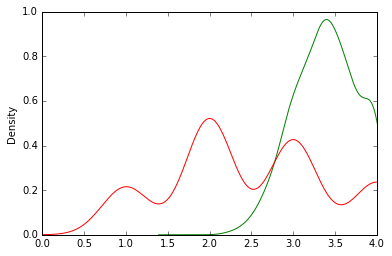

In [26]:
# plot the distribution of each variable 

df_new["gpa"].plot(kind="density", xlim=(0,4));
df_new["prestige"].plot(kind="density", xlim=(0,4));

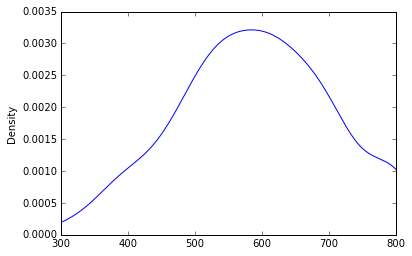

In [27]:
df_new["gre"].plot(kind="density", xlim=(300,800))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, the distributions for GRE and GPA are somewhat skewed, but the one for prestige is definitely not normal

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: We could correct for the dataset to return it to normal distribution, by removing outliers. Alternatively we could use models that are non-linear like decision trees to model this out which does not require normal distribution.

#### Question 11. Which of our variables are potentially colinear? 

In [28]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Admission is most positively correlated with gre then gpa and negatively correlated with prestige (probably because 1 is the most prestigous and 4 is the least prestigious). gpa and gre are the most positively correlated between each other.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:Since this model would only have one independent and one depentend variable I could build a linear regression model to measure the impact of undergrad program prestige on grad school admissions rate. 

#### Question 14. What is your hypothesis? 

Answer: The more prestigious an undergraduate program is the likelier the student is to get admitted to the grad school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [ ]:
#you could mark them as none when reading the data. This would be useful because incomplete data could potentially 
#tell us interesting patterns. Not sure about the applicability to admissions,
#but certainly for a response model for a marketing mailing campaign


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data